In [1]:
# semantic sam
from semantic_sam.BaseModel import BaseModel
from semantic_sam import build_model
from semantic_sam.utils.dist import init_distributed_mode
from semantic_sam.utils.arguments import load_opt_from_config_file
from semantic_sam.utils.constants import COCO_PANOPTIC_CLASSES
from task_adapter.semantic_sam import inference_semsam_m2m_auto
import torch
import matplotlib.pyplot as plt

/home/rilab/.pyenv/versions/3.10.12/envs/vgpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
semsam_cfg = "./config/sesam.yaml"
semsam_ckpt = "./ckpt/swinl_only_sam_many2many.pth"


In [3]:
opt_semsam = load_opt_from_config_file(semsam_cfg)

In [4]:
model_semsam = BaseModel(opt_semsam, build_model(opt_semsam)).from_pretrained(semsam_ckpt).eval().cuda()

/home/rilab/.pyenv/versions/3.10.12/envs/vgpt/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
$UNUSED$ criterion.empty_weight, Ckpt Shape: torch.Size([2])


In [139]:
label_mode = 'Number'
alpha = 0.1
anno_mode = ["Mark"] # ["Mark", "Mask", "Box"]
text_size, hole_scale, island_scale=640,100,100

(1280, 720)


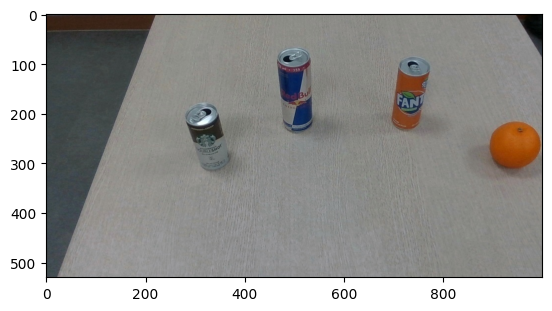

In [140]:
from PIL import Image
image = Image.open("./ori_3.png")
print(image.size)
image = image.crop((100,100,1100,630))

plt.figure()
plt.imshow(image)
plt.show()

In [141]:
level = [2]
semantic = False
text_size, hole_scale, island_scale=640,100,100
text, text_part, text_thresh = '','','0.0'

In [142]:
output, mask = inference_semsam_m2m_auto(model_semsam, image, level, \
                                         text, text_part, text_thresh, text_size, hole_scale, island_scale, semantic, \
                                            label_mode=label_mode, alpha=alpha, anno_mode=anno_mode)

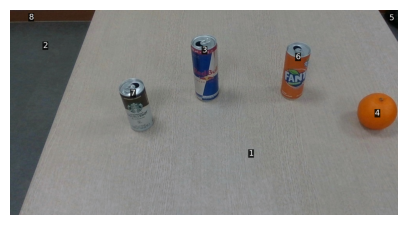

In [144]:
plt.figure(figsize=(5,5))
plt.imshow(output)
plt.axis('off')
# plt.savefig("./output.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [145]:
output = Image.fromarray(output)
output.save("./output.png")

In [133]:
import numpy as np

In [135]:
temp = np.zeros_like(output)

for i,m in enumerate(mask):
    seg = m['segmentation']
    temp[seg] = 30*(i+1)

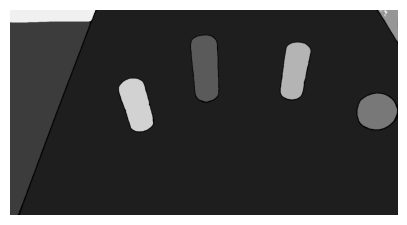

In [136]:
plt.figure(figsize=(5,5))
plt.imshow(temp)
plt.axis('off')
plt.show()